In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
display(df['price'].describe())
print(f"Количество домов  стоимостью больше 3 миллионов: {(df['price'] > 3_000_000).sum()}")

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Количество домов  стоимостью больше 3 миллионов: 45


 Изучите стоимости недвижимости

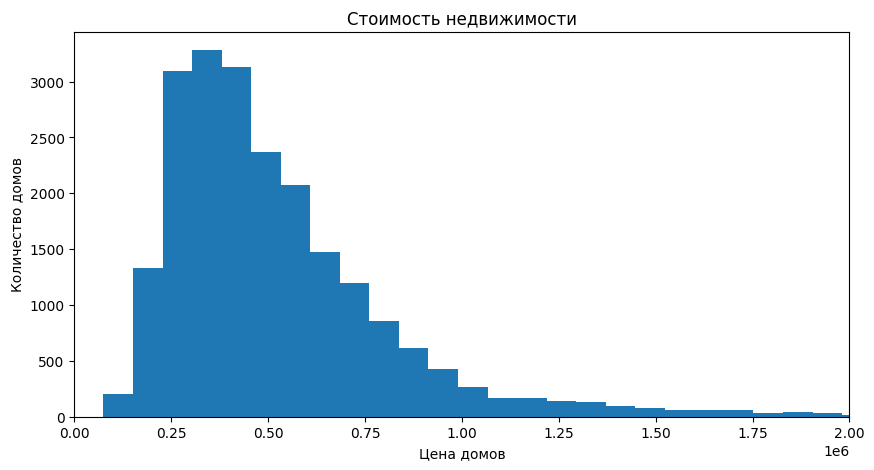

In [26]:
plt.figure(figsize=(10, 5))
plt.title('Стоимость недвижимости')
plt.xlabel('Цена домов')
plt.ylabel('Количество домов')
plt.hist(df['price'],bins=100 )
plt.xlim(0, 2_000_000)
plt.show()

Изучите распределение квадратуры жилой площади

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

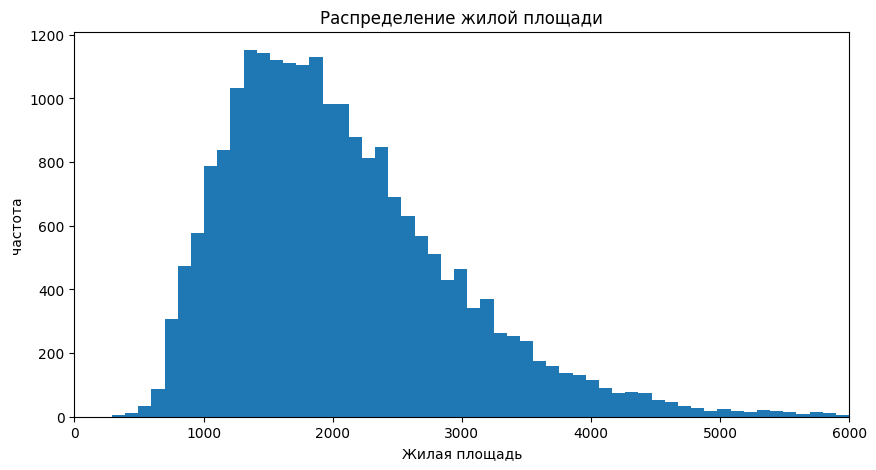

In [30]:
display(df['sqft_living'].describe())
plt.figure(figsize=(10, 5))
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('частота')
plt.hist(df['sqft_living'],bins=130 )
plt.xlim(0, 6000)
plt.show()

# plt.plot(df['price'], df['count'])


Основная частота распределения жилой площади приходится на интервал от 1000 до 2700 м.кв. Эти квартиры пользуются наибольшей популярностью.

Изучите распределение года постройки

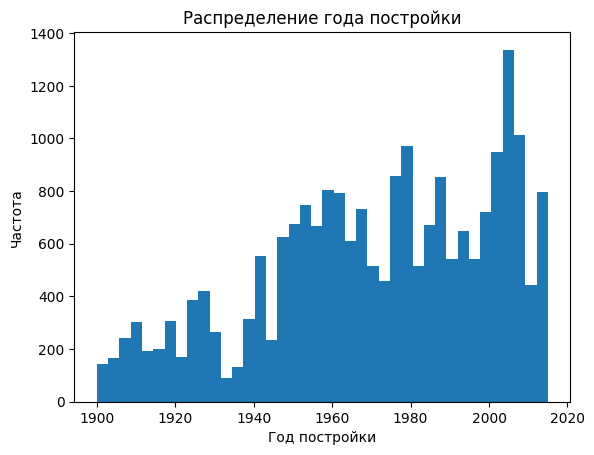

In [32]:
plt.hist(df['yr_built'], bins=40)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Частота')
plt.show()

По графику видно, в какие периоды велось интенсивное строительство, а в какие года был спад. Можно сделать вывод, что спад происходил в года экономического спада развития.

Изучите распределение домов от наличия вида на набережную

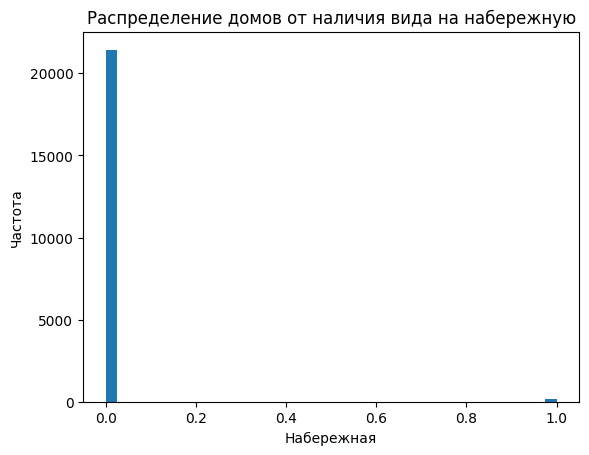

In [35]:
plt.hist(df['waterfront'], bins=40)
plt.title('Распределение домов от наличия вида на набережную')
plt.xlabel('Набережная')
plt.ylabel('Частота')
plt.show()

По графику мы можем сделать вывод, что домов с видом на набережную очень мало

Изучите распределение этажей домов

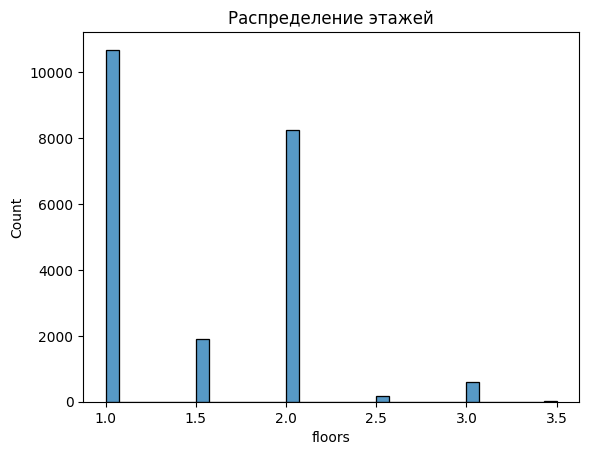

In [37]:
sns.histplot(df['floors']).set(title='Распределение этажей');

ГРафик показывает, что преобладают дома с 1 и 2 этажами. Другая этажность домов пользуется меньшей популярностью.

 Изучите распределение состояния домов

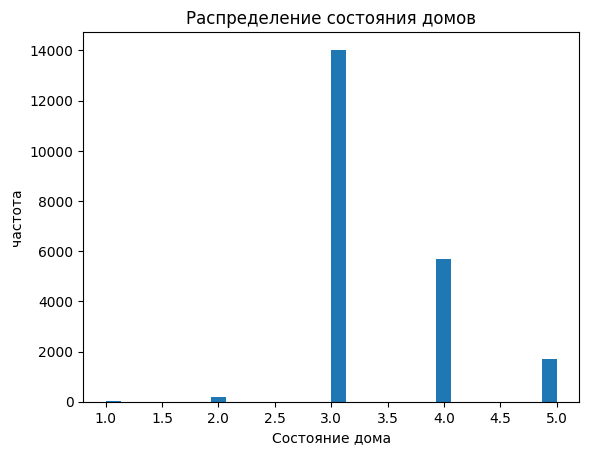

In [43]:
plt.hist(df['condition'],bins=30 )
plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('частота')
plt.show()

По графику мы видим, что в основной своей массе, дома находятся в удовлетворительном состоянии по пяибальной шкале.

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

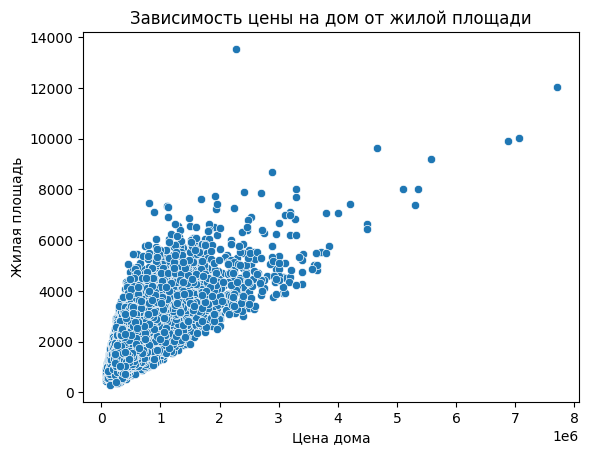

In [44]:
sns.scatterplot(x=df['price'],y=df['sqft_living'] )
plt.title('Зависимость цены на дом от жилой площади')
plt.xlabel('Цена дома')
plt.ylabel('Жилая площадь')
plt.show()

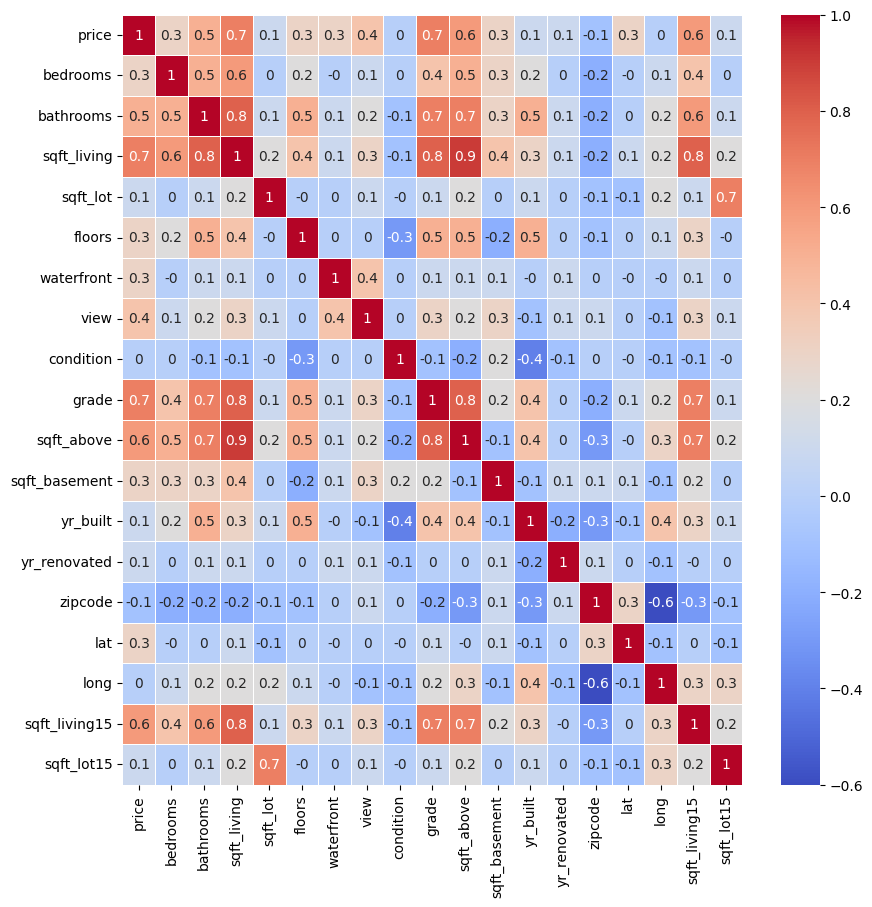

In [46]:
plt.figure(figsize=[10,10])
sns.heatmap(df.drop(columns=['id','date']).corr().round(1), annot=True, linewidths=.5, cmap='coolwarm');

Зависимость между ценой на дом и жилой площадью

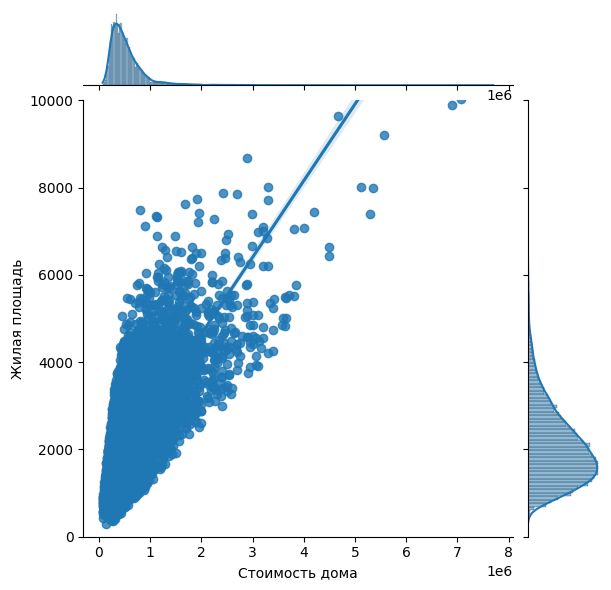

In [54]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.xlabel('Стоимость дома')
plt.ylim(0, 10000)
plt.ylabel('Жилая площадь')
plt.show()

Зависимость признака долготы и широты

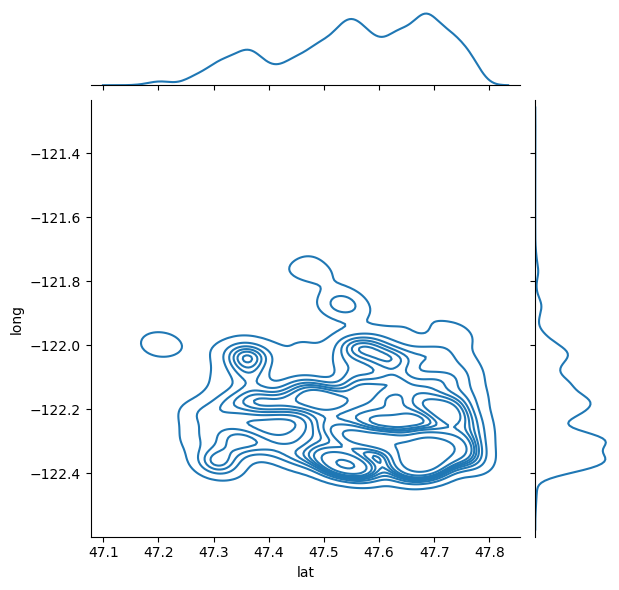

In [57]:
sns.jointplot(x= df['lat'], y=df['long'], kind='kde');

Из анализа этого графика можно сделать вывод, что все расположенные в таблице дома находятся в крупном городе с плотной застройкой. Особенно сильная плотность наблюдается на широте 47.5 - 47.8.

Взаимосвязь между классом жилья и его стоимостью

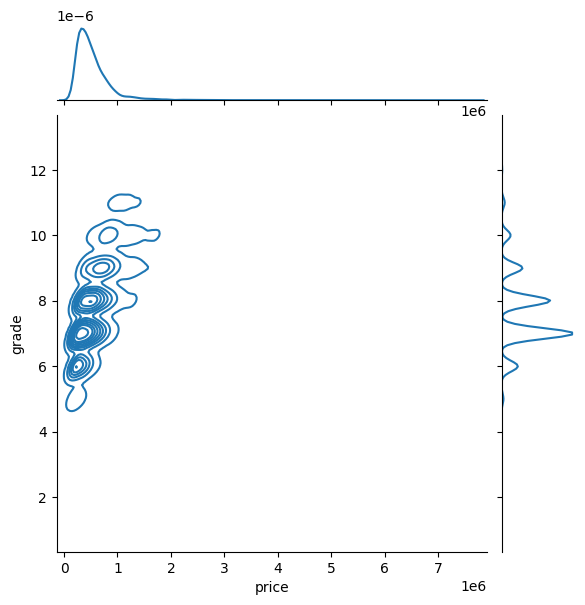

In [58]:
sns.jointplot(x= df['price'], y=df['grade'], kind='kde');